In [30]:
import pandas as pd
df = pd.read_csv("carpices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


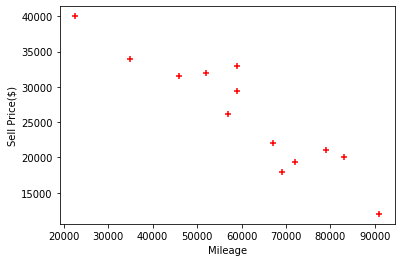

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(df.Mileage,df[["Sell Price($)"]], color = "red", marker = '+')

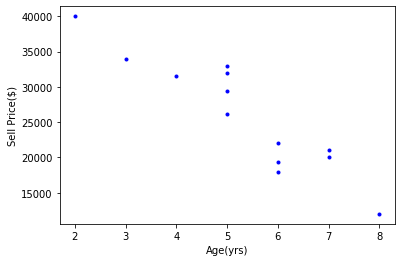

In [52]:
%matplotlib inline
plt.xlabel("Age(yrs)")
plt.ylabel("Sell Price($)")
plt.scatter(df[["Age(yrs)"]],df[["Sell Price($)"]], color = "blue", marker = '.')

In [53]:
dummies = pd.get_dummies(df["Car Model"])
dummies.head(3)

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0


In [54]:
merged = pd.concat([df, dummies], axis = 'columns')
merged.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [55]:
final = merged.drop(['Car Model', 'Audi A5'], axis = 'columns')
final.head()

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0


In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
x = final.drop(['Sell Price($)'], axis = 'columns')
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [58]:
y = final['Sell Price($)']
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [59]:
model.fit(x.values, y)

LinearRegression()

Price of mercedez benz that is 4 yr old with mileage 45000

In [60]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

Price of BMW X5 that is 7 yr old with mileage 86000

In [61]:
model.predict([[86000, 7, 1, 0]])

array([11080.74313219])

Model Accuracy

In [62]:
model.score(x.values,y)

0.9417050937281082